Importing packages needed for this project.

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import h5py
from PIL import Image
from h5data import load_dataset
from dnn import dnn
import os
from path import my_path

In [2]:
my_path = my_path
data_folder = "Datasets"
path = os.path.join(my_path, data_folder)
train_X_orig, train_y, test_X_orig, test_y , classes = load_dataset(path, 'train_catvnoncat.h5', 'test_catvnoncat.h5')

Explore the dataset

It shows that there are 209 images in training data. Each image has size 64x64x3 (3 represents RGB). Y train is row vector with 209 columns. Y take values 1 (cat) and 0 (non cat). To apply the neural network model, we will need to reshape X train and X test datasets. Also, for images dataset, the algorithm will work better if we standardize or normalize before running the ML model. For this dataset, we will standardize by dividing it by its maximum value (255).

In [3]:
print("X train has shape: "+ str(train_X_orig.shape))
print("Y train has shape: "+ str(train_y.shape))
print(classes)

X train has shape: (209, 64, 64, 3)
Y train has shape: (1, 209)
[b'non-cat' b'cat']


y= [0], it is a 'non-cat' picture.


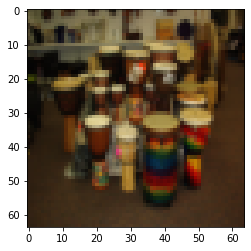

In [4]:
## plot an image in training set
index = 5
plt.imshow(train_X_orig[index])
class_name = classes[np.squeeze(train_y[:, index])].decode("utf-8")
print("y= "+ str(train_y[:, index]) + ", it is a '" + class_name + "' picture.")

In [5]:
train_n_x, test_n_x = train_X_orig.shape[0], test_X_orig.shape[0]
num_px = train_X_orig.shape[1] #num_px is the same for training and testing sets.

Preprocessing the dataset with 2 steps:
1. Since our deep learning algorithm takes in input as a matrix of sizes (number_of_features, number_of_examples). We need to flatten X train and X test datasets using reshape function. train_y and test_y already have correct dimensions, so we will not preprocess them.

2. Standardize the train and test sets: It appears that the algorithm will work better and faster if we standardize it, so we will standardize them by dividing them by 255. (its maximum value)

In [6]:
train_X_flatten = train_X_orig.reshape(train_n_x, -1).T
test_X_flatten = test_X_orig.reshape(test_n_x, -1).T
print("X train now has shape: ", train_X_flatten.shape)
print("Y train has shape: ", train_y.shape)
print("X test now has shape: ", test_X_flatten.shape)
print("Y test has shape: ", test_y.shape)
print("There are {} training examples in the train set".format(train_X_flatten.shape[1]))
print("There are {} training examples in the test set".format(test_X_flatten.shape[1]))

X train now has shape:  (12288, 209)
Y train has shape:  (1, 209)
X test now has shape:  (12288, 50)
Y test has shape:  (1, 50)
There are 209 training examples in the train set
There are 50 training examples in the test set


Now the train and test sets have correct dimensions. We will standardize them before we apply the dnn model

In [7]:
train_X =  train_X_flatten/255.
test_X  =  test_X_flatten/255.

We will first train the model with 2 layers with 5 units in the hidden layer and 1 unit in the output layer

In [8]:
train_n_x = train_X.shape[0]
layer_sizes = [train_n_x, 7, 1] #two layer model
two_layers_model = dnn(train_X, train_y, layer_sizes)
two_layer_params, two_layer_costs = two_layers_model.fit( 2500, 0.0075, print_cost = True)

Cost at 0th iteration is: 0.7107729894566882.
Cost at 100th iteration is: 0.5346895124486307.
Cost at 200th iteration is: 0.4505857829449251.
Cost at 300th iteration is: 0.4304501384311362.
Cost at 400th iteration is: 0.3912757869008156.
Cost at 500th iteration is: 0.3520114450957538.
Cost at 600th iteration is: 0.31466204306777673.
Cost at 700th iteration is: 0.27829764200928897.
Cost at 800th iteration is: 0.24114533170765204.
Cost at 900th iteration is: 0.21370871702698574.
Cost at 1000th iteration is: 0.13149635203365595.
Cost at 1100th iteration is: 0.10606121605041151.
Cost at 1200th iteration is: 0.4437638217870026.
Cost at 1300th iteration is: 0.07783640882246712.
Cost at 1400th iteration is: 0.06613176359037541.
Cost at 1500th iteration is: 0.056946957833073096.
Cost at 1600th iteration is: 0.04958175233454018.
Cost at 1700th iteration is: 0.04358117557683242.
Cost at 1800th iteration is: 0.03862989406627703.
Cost at 1900th iteration is: 0.03450298526398464.
Cost at 2000th ite

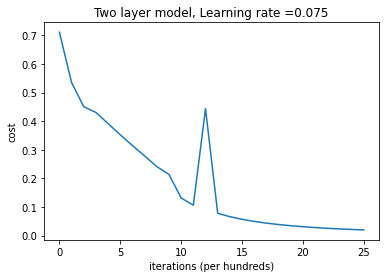

In [9]:
learning_rate = 0.075
plt.plot(np.squeeze(two_layer_costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Two layer model, Learning rate =" + str(learning_rate))
plt.show()

In [10]:

layer_sizes = [12288,20, 7, 5, 1]
four_layers_model = dnn(train_X, train_y, layer_sizes)
four_layer_params, four_layer_costs = four_layers_model.fit(num_iterations=2500, learning_rate=0.0075, print_cost = True)

Cost at 0th iteration is: 0.6970060259628258.
Cost at 100th iteration is: 0.5534749610908571.
Cost at 200th iteration is: 0.4985708192511039.
Cost at 300th iteration is: 0.4508976054407221.
Cost at 400th iteration is: 0.40306803535414665.
Cost at 500th iteration is: 0.3574429309617457.
Cost at 600th iteration is: 0.2528232564453889.
Cost at 700th iteration is: 0.17715885217962524.
Cost at 800th iteration is: 0.15243278068801677.
Cost at 900th iteration is: 0.17514716461246208.
Cost at 1000th iteration is: 0.5350007845983774.
Cost at 1100th iteration is: 0.03654364551538165.
Cost at 1200th iteration is: 0.024263649381678472.
Cost at 1300th iteration is: 0.017520566045480832.
Cost at 1400th iteration is: 0.013119230424055387.
Cost at 1500th iteration is: 0.010415372908993067.
Cost at 1600th iteration is: 0.008514586959753762.
Cost at 1700th iteration is: 0.007129208871825167.
Cost at 1800th iteration is: 0.006093968750281753.
Cost at 1900th iteration is: 0.00529098633306403.
Cost at 2000

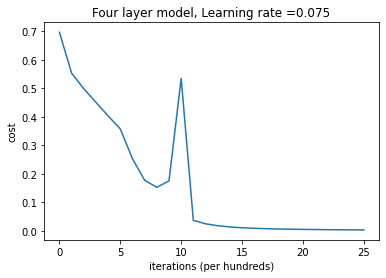

In [11]:
learning_rate = 0.075
plt.plot(np.squeeze(four_layer_costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Four layer model, Learning rate =" + str(learning_rate))
plt.show()

In [14]:
y_test_pred2 = two_layers_model.predict(test_X, two_layer_params)
test_accuracy2 = two_layers_model.accuracy(y_test_pred2, test_y)
y_train_pred2= two_layers_model.predict(train_X, two_layer_params)
train_accuracy2 = two_layers_model.accuracy(y_train_pred2, train_y)

y_test_pred4 = four_layers_model.predict(test_X, four_layer_params)
test_accuracy4 = four_layers_model.accuracy(y_test_pred4, test_y)
y_train_pred4= four_layers_model.predict(train_X, four_layer_params)
train_accuracy4 = four_layers_model.accuracy(y_train_pred4, train_y)
print("Two layer model: \n Test accuracy: {} \n Train accuracy: {}".format(test_accuracy2, train_accuracy2))
print("Four layer model: \n Test accuracy: {} \n Train accuracy: {}".format(test_accuracy4, train_accuracy4))


Two layer model: 
 Test accuracy: 0.72 
 Train accuracy: 0.9999999999999998
Four layer model: 
 Test accuracy: 0.76 
 Train accuracy: 0.9999999999999998


In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    
    parameters= dnn.initialize_parameters_deep(layers_dims)
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        #(≈ 1 line of code)
        # AL, caches = ...
        # YOUR CODE STARTS HERE
        
        AL, caches = dnn.L_forward_prop(X, parameters)
        
        # YOUR CODE ENDS HERE
        
        # Compute cost.
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = dnn.compute_cost(AL, Y)
        
        # YOUR CODE ENDS HERE
    
        # Backward propagation.
        #(≈ 1 line of code)
        # grads = ...    
        # YOUR CODE STARTS HERE
        
        grads = dnn.L_backward_prop(AL, Y, caches)
        # YOUR CODE ENDS HERE
 
        # Update parameters.
        #(≈ 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters= dnn.update_parameters(grads, parameters, learning_rate)
        
        # YOUR CODE ENDS HERE
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [ ]:
layer_sizes=[12288, 20, 7, 5, 1]
parameters, costs = L_layer_model(X_train, train_y, layer_sizes, num_iterations = 2500, print_cost = True)

In [ ]:
test_accuracy = np.sum(np.abs(y_test_prediction - test_y))/(test_y.shape[1])
train_accuracy = np.sum(np.abs(y_train_prediction - train_y))/(train_y.shape[1])
print("test accuracy is: {}".format(test_accuracy))
print("train accuracy is: {}".format(train_accuracy))

In [ ]:
learning_rate = 0.0075
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
